In [1]:
import pymysql
import pandas as pd
import numpy as np

In [2]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [4]:
TcSql = 'SELECT p1.ORDER_CODE,p1.RESULT,p1.UPPER_VALUE,p1.LOWER_VALUE,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER \
    FROM (SELECT * FROM t66_athena_basic_quantity_record WHERE SZ_STATUS = 1 AND SD_CODE = "S0000175N23") p1 \
    LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE' 
Tc_Recode = pd.read_sql(TcSql,con=conn)

In [6]:
Tc_Recode.to_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_Recode.pkl")

### 检测上下限范围分布

In [114]:
Tc_Recode["ValueRangeMean"] = (Tc_Recode.UPPER_VALUE + Tc_Recode.LOWER_VALUE)/2

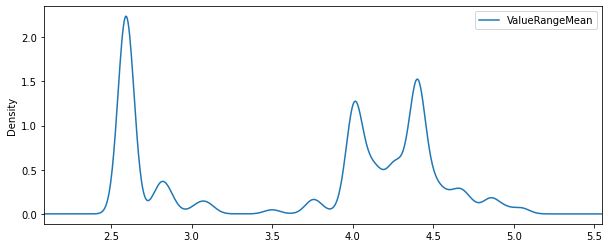

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
Tc_Recode.ValueRangeMean.dropna().plot(kind='kde', xlim=(min(Tc_Recode.ValueRangeMean)-0.5,max(Tc_Recode.ValueRangeMean)+0.5),label = "ValueRangeMean")
plt.legend()
plt.show()

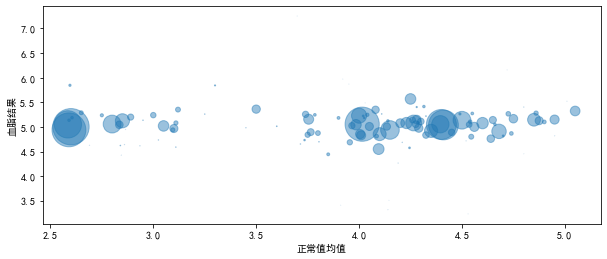

In [184]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,4))
Range = Result_Range.index
result = Result_Range['mean'].values
size = Result_Range.len.values/100
plt.scatter(Range,result,s = size,alpha=0.45)
plt.xlabel('正常值均值')  
plt.ylabel('血脂结果')
plt.show()

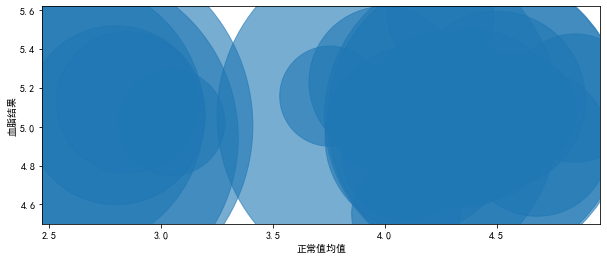

In [177]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,4))
Range = Result_Range_C.index
result = Result_Range_C['mean'].values
size = Result_Range_C['len'].values
plt.scatter(Range,result,s = size,alpha=0.6)
plt.xlabel('正常值均值')  
plt.ylabel('血脂结果')
plt.show()

In [123]:
Result_Range = Tc_Recode.groupby(['ValueRangeMean'])['RESULT'].agg([np.mean,len]).dropna()

In [170]:
a = pd.DataFrame(Result_Range['len'].apply(lambda x:0 if x < 10000 else x))

In [172]:
Result_Range_C = Result_Range.copy()

In [176]:
Result_Range_C = Result_Range_C.loc[Result_Range_C["len" ] > 10000]

In [152]:
test = pd.DataFrame(Result_Range['len'].sort_values(ascending = False))
test

,len
ValueRangeMean,
2.600,132093.0
4.015,116911.0
2.590,114738.0
4.400,89805.0
4.410,88680.0
...,...
3.920,1.0
3.700,1.0
4.800,1.0


In [3]:
Tc_Recode = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_Recode.pkl")

In [6]:
Tc = Tc_Recode.copy()

In [7]:
Tc['new_date'] = Tc['EXAM_DATE'].dt.date

In [8]:
Tc.index = pd.DatetimeIndex(Tc.new_date)

In [10]:
Tc.drop(columns = ['EXAM_DATE'],inplace = True)

In [59]:
Tc.axes

[DatetimeIndex(['2020-02-29', '2020-01-12', '2020-01-13', '2020-01-14',
                '2020-01-11', '2020-01-09', '2020-01-04', '2020-01-09',
                '2020-01-08', '2020-01-11',
                ...
                '2018-01-09', '2017-09-08', '2017-11-05', '2018-06-03',
                '2017-11-06', '2017-06-07', '2018-06-04', '2017-01-18',
                '2017-08-30', '2017-03-29'],
               dtype='datetime64[ns]', name='new_date', length=1236596, freq=None),
 Index(['ORDER_CODE', 'RESULT', 'UPPER_VALUE', 'LOWER_VALUE', 'EXAMINEE_AGE',
        'EXAMINEE_GENDER'],
       dtype='object')]

In [191]:
Tc_Recode

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
0,606898462371,3.83,5.70,2.33,2020-02-29 00:00:00,73.0,M
1,485194753251,5.57,6.10,2.90,2020-01-12 00:00:00,60.0,MW
2,064707165127,5.60,6.10,2.90,2020-01-13 00:00:00,73.0,M
3,074452138242,6.74,5.69,2.33,2020-01-14 00:00:00,48.0,MW
4,016056732550,5.04,5.18,0.00,2020-01-11 00:00:00,51.0,MW
...,...,...,...,...,...,...,...
1236591,5khk67n93ctctw4,3.38,5.20,0.00,2017-06-07 09:00:00,32.0,M
1236592,5khk67pixoiqdqs,4.28,5.70,0.00,2018-06-04 09:00:00,63.0,MW
1236593,5khk67rrk1xxdve,5.68,5.70,2.33,2017-01-18 09:00:00,63.0,M
1236594,5khk67wspzz2kzx,4.42,5.70,2.83,2017-08-30 09:00:00,62.0,MW


In [11]:
Tc["ValueRangeMean"] = (Tc.UPPER_VALUE + Tc.LOWER_VALUE)/2

In [69]:
Tc_w = pd.DataFrame(Tc.ValueRangeMean.resample('W').mean())
Tc_d = pd.DataFrame(Tc.ValueRangeMean.resample('D').mean())

<Figure size 1152x576 with 0 Axes>

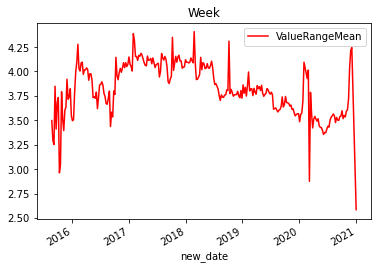

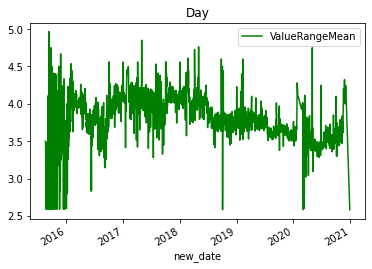

In [89]:
import matplotlib.pyplot as plt

data = [Tc_w,Tc_d]
colors = ["red","green"]
title= ["Week","Day"]


plt.figure(figsize = (16,8))
for i in range(0,2):
    data[i].dropna().plot(color = colors[i])
    plt.title(title[i])
    plt.show()        

### Tc结果

In [190]:
Tc_W = pd.DataFrame(Tc_new.RESULT.resample('W').agg([len,sum,np.mean]))
Tc_D = pd.DataFrame(Tc_new.RESULT.resample('D').agg([len,sum,np.mean]))

Age_W = Tc_new.EXAMINEE_AGE.resample("W").mean()
Age_D = Tc_new.EXAMINEE_AGE.resample("D").mean()

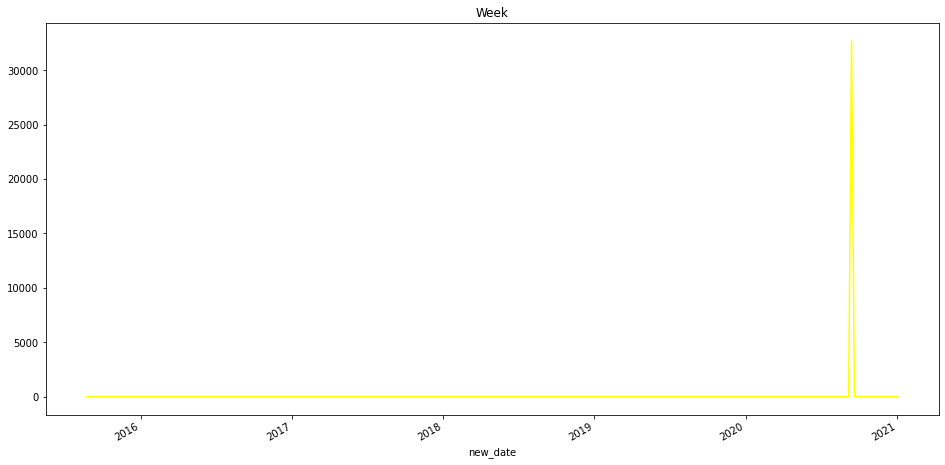

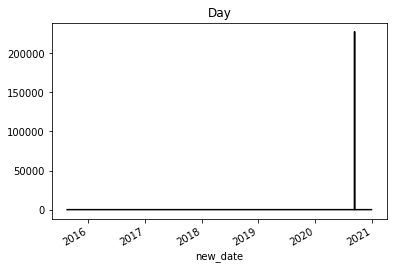

In [103]:
data = [Tc_W["mean"],Tc_D["mean"]]
colors = ["yellow","black"]
title= ["Week","Day"]

plt.figure(figsize = (16,8))

for i in range(0,2):
    data[i].dropna().plot(color = colors[i])
    plt.title(title[i])
    plt.show() 

In [133]:
Tc_W_ = Tc_W.sort_values(by = "mean",ascending = False )[1:]
Tc_D_ = Tc_D.sort_values(by = "mean", ascending = False)[1:]

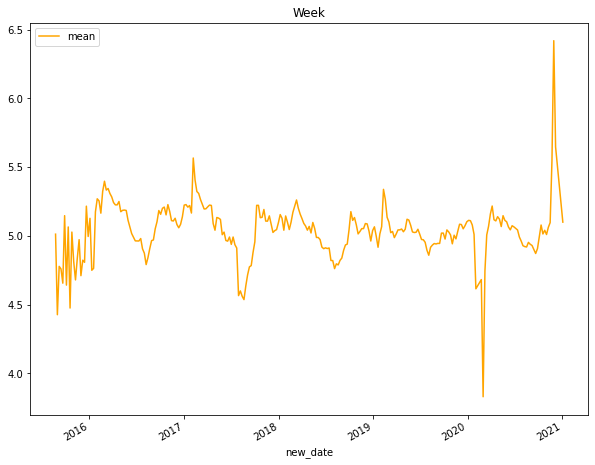

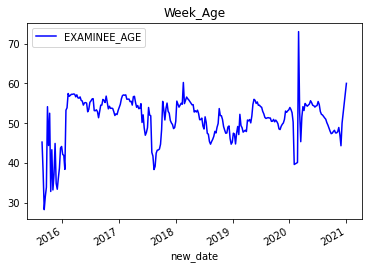

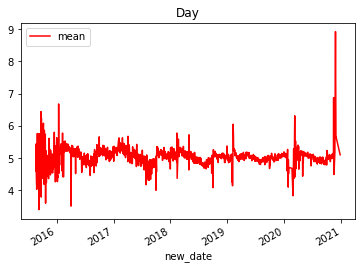

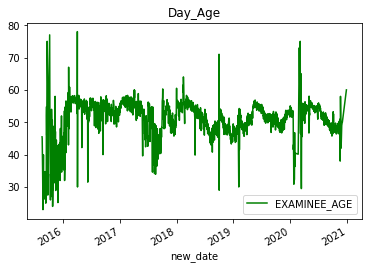

In [190]:
data = [Tc_W_["mean"],Age_W,Tc_D_["mean"],Age_D]
colors = ["orange","blue","red","green"]
title= ["Week","Week_Age","Day","Day_Age"]

plt.figure(figsize = (10,8))

for i in range(0,4):
    data[i].dropna().plot( color = colors[i])
    plt.title(title[i])
    plt.legend()
    plt.show()

Text(0.5, 1.0, 'Tc_Age(Week)')

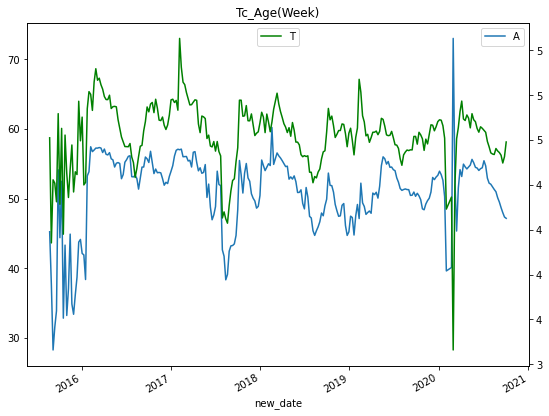

In [92]:
from matplotlib.ticker import FuncFormatter

fig,ax=plt.subplots(1,1,figsize=(9,6))
ax1 = ax.twinx()

@FuncFormatter
def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


Tc_W["mean"].dropna().plot(ax=ax1,figsize=(9,6),style=['g-'])
ax1.legend(('Tc'),loc = 'upper center')

Age_W.dropna().plot(ax=ax,figsize=(9,7)) 
ax.legend('Age')
plt.title("Tc_Age(Week)")

In [172]:
age = Tc.loc[:,'EXAMINEE_AGE']

In [180]:
Tc = Tc.sort_values(by = 'RESULT',ascending = False)

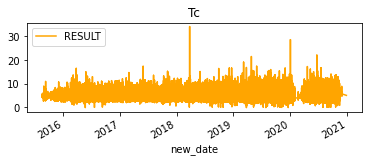

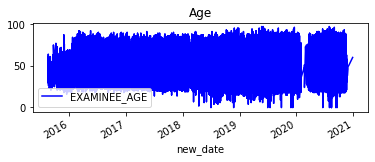

In [182]:
data = [Tc['RESULT'][1:],Tc['EXAMINEE_AGE']]
colors = ["orange","blue"]
title= ["Tc","Age"]

plt.figure()

for i in range(0,2):
    ax = plt.subplot(2,1,i+1)
    data[i].dropna().plot(ax = ax, color = colors[i])
    plt.title(title[i])
    plt.legend()
    plt.show()

### 异常值分析

In [4]:
Tc_Recode

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
0,606898462371,3.83,5.70,2.33,2020-02-29 00:00:00,73.0,M
1,485194753251,5.57,6.10,2.90,2020-01-12 00:00:00,60.0,MW
2,064707165127,5.60,6.10,2.90,2020-01-13 00:00:00,73.0,M
3,074452138242,6.74,5.69,2.33,2020-01-14 00:00:00,48.0,MW
4,016056732550,5.04,5.18,0.00,2020-01-11 00:00:00,51.0,MW
...,...,...,...,...,...,...,...
1236591,5khk67n93ctctw4,3.38,5.20,0.00,2017-06-07 09:00:00,32.0,M
1236592,5khk67pixoiqdqs,4.28,5.70,0.00,2018-06-04 09:00:00,63.0,MW
1236593,5khk67rrk1xxdve,5.68,5.70,2.33,2017-01-18 09:00:00,63.0,M
1236594,5khk67wspzz2kzx,4.42,5.70,2.83,2017-08-30 09:00:00,62.0,MW


In [5]:
Tc_A = Tc_Recode.copy()

In [157]:
Tc_A_ = Tc_A.set_index(Tc_A.EXAM_DATE)

Tc_A_.loc[((Tc_A_.index.year == 2020) & (Tc_A_.index.month == 9)& (Tc_A_.index.date == 10)),:]

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
EXAM_DATE,,,,,,,


In [168]:
TcA = Tc_A_.loc[Tc_A_.index == "2020-09-10 00:00:00",:].sort_values(by = "RESULT",ascending = False)

In [170]:
TcA.loc[TcA.RESULT > 10,:]

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
EXAM_DATE,,,,,,,
2020-09-10,5kfg7r5ymgil9r4,268435455.0,5.6,2.86,2020-09-10,48.0,M


### 年龄分析

#### 1. 年龄的血脂分布

In [12]:
Tc2020 = Tc.loc[Tc.index.year == 2020,:]
Tc202010 = Tc2020.loc[Tc2020.index.month >= 10,:]

In [13]:
Tc_new = Tc[~Tc['ORDER_CODE'].isin(Tc202010["ORDER_CODE"])]

In [14]:
Tc_new = Tc_new.sort_values(by = 'RESULT',ascending = False)[1:]

In [15]:
Tc_new.head()

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date,ValueRangeMean
new_date,,,,,,,,
2018-03-26,400753209582,34.00,5.85,2.8,52.0,M,2018-03-26,4.325
2020-01-03,007286487681,28.51,6.00,1.0,57.0,M,2020-01-03,3.500
2020-06-21,088460718921,22.00,5.20,0.0,50.0,M,2020-06-21,2.600
2019-04-27,5kh45ycc3q3d510,21.40,5.18,0.0,51.0,M,2019-04-27,2.590
2020-01-03,163778112223,19.31,5.18,0.0,30.0,M,2020-01-03,2.590


In [48]:
set(Tc_new.EXAMINEE_GENDER.values)

{'M', 'MW', None, 'UW'}

In [44]:
AgeResult = pd.DataFrame(Tc_new.groupby('EXAMINEE_AGE')["RESULT"].mean())

In [61]:
AgeResult

,RESULT
EXAMINEE_AGE,
0.0,5.071706
2.0,3.925000
4.0,4.090000
5.0,5.330000
6.0,4.108750
...,...
93.0,5.095000
94.0,4.508333
95.0,4.568750


In [67]:
MenResult = pd.DataFrame(Tc_new.loc[Tc_new.EXAMINEE_GENDER == "M",["RESULT","EXAMINEE_AGE"]])
WomenResult = pd.DataFrame(Tc_new.loc[Tc_new.EXAMINEE_GENDER.isin (["MW","UM"]) ,["RESULT",'EXAMINEE_AGE']])

In [82]:
MenResult_a = pd.DataFrame(MenResult.groupby("EXAMINEE_AGE")["RESULT"].mean())
WomenResult_a = pd.DataFrame(WomenResult.groupby("EXAMINEE_AGE")["RESULT"].mean())

In [83]:
WomenResult_a

,RESULT
EXAMINEE_AGE,
0.0,4.875800
5.0,5.460000
7.0,3.890000
14.0,4.225000
15.0,3.580000
...,...
93.0,5.454286
94.0,4.440000
95.0,4.320000


In [59]:
MenResult_ = pd.DataFrame(MenResult.RESULT.resample("W").mean())
WomenResult_ = pd.DataFrame(WomenResult.RESULT.resample("W").mean())

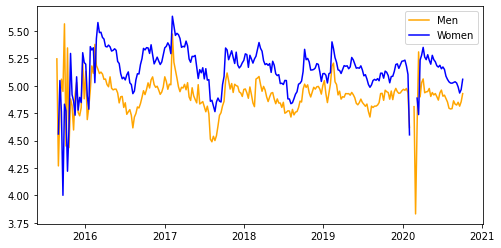

In [65]:
data = [MenResult_,WomenResult_]
colors = ["orange","blue"]
label = ["Men","Women"]


plt.figure(figsize = (8,4))
for i in range(0,2):
    plt.plot(data[i], color = colors[i],label = label[i])
    plt.legend()
plt.show()

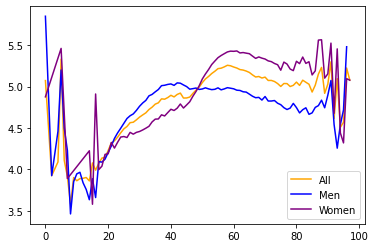

In [84]:
data = [AgeResult,MenResult_a,WomenResult_a]
colors = ["orange","blue","purple"]
label = ["All","Men","Women"]

for i in range(0,3):
    plt.plot(data[i], color = colors[i],label = label[i])
    plt.legend()
plt.show()

#### 2. 时间的血脂变化（分段年龄）

In [16]:
bins = [0,20,55,100]
bins_label = ["young(<20)","adult(20-55)","senior(>55)"]
Tc_new["Age_label"] = pd.cut(Tc_new['EXAMINEE_AGE'],bins = bins, labels = bins_label)

In [18]:
Tc_new

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date,ValueRangeMean,Age_label
new_date,,,,,,,,,
2018-03-26,400753209582,34.000,5.85,2.80,52.0,M,2018-03-26,4.325,adult(20-55)
2020-01-03,007286487681,28.510,6.00,1.00,57.0,M,2020-01-03,3.500,senior(>55)
2020-06-21,088460718921,22.000,5.20,0.00,50.0,M,2020-06-21,2.600,adult(20-55)
2019-04-27,5kh45ycc3q3d510,21.400,5.18,0.00,51.0,M,2019-04-27,2.590,adult(20-55)
2020-01-03,163778112223,19.310,5.18,0.00,30.0,M,2020-01-03,2.590,adult(20-55)
...,...,...,...,...,...,...,...,...,...
2019-12-20,045934811268,0.015,5.18,0.00,53.0,M,2019-12-20,2.590,adult(20-55)
2019-07-29,885766010232,0.010,5.20,0.00,39.0,M,2019-07-29,2.600,adult(20-55)
2019-07-29,644101243722,0.010,5.20,0.00,68.0,M,2019-07-29,2.600,senior(>55)


In [19]:
Tc_new.to_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_new.pkl")

In [26]:
Tc_Y= pd.DataFrame(Tc_new.loc[Tc_new.Age_label == "young(<20)","RESULT"])
Tc_Y = pd.DataFrame(Tc_Y.RESULT.resample('W').agg([len,sum,np.mean]))

In [31]:
Tc_A = pd.DataFrame(Tc_new.loc[Tc_new.Age_label == "adult(20-55)","RESULT"])
Tc_A = pd.DataFrame(Tc_A.RESULT.resample("W").agg([len,sum,np.mean]))

In [32]:
Tc_S = pd.DataFrame(Tc_new.loc[Tc_new.Age_label == "senior(>55)","RESULT"])
Tc_S = pd.DataFrame(Tc_S.RESULT.resample("W").agg([len,sum,np.mean]))

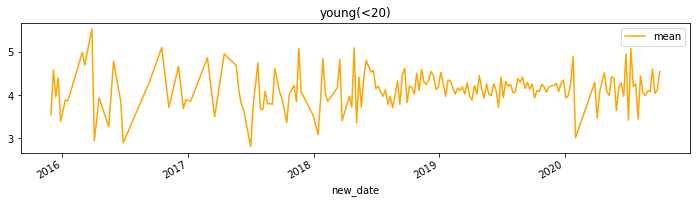

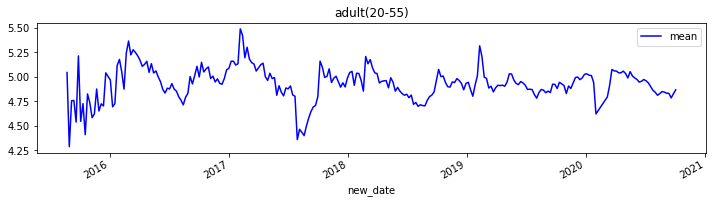

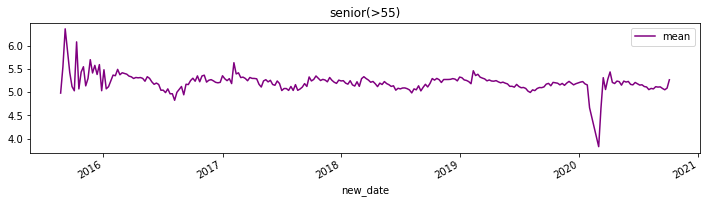

In [43]:
import matplotlib.pyplot as plt

data = [Tc_Y,Tc_A,Tc_S]
colors = ["orange","blue","purple"]
title= ["young(<20)","adult(20-55)","senior(>55)"]



for i in range(0,3):
    plt.figure(figsize = (12,9))
    ax = plt.subplot(3,1,i+1)
    data[i]["mean"].dropna().plot(ax = ax, color = colors[i])
    plt.title(title[i])
    plt.legend()
    plt.show()

In [94]:
Tc_Adult_Age = pd.DataFrame(Tc_new.loc[Tc_new.Age_label == "adult(20-55)",["RESULT","EXAMINEE_AGE"]])
Tc_Adult_Result = pd.DataFrame(Tc_Adult_Age.RESULT.resample("W").agg([len,sum,np.mean]))
Tc_Adult_Age = pd.DataFrame(Tc_Adult_Age.EXAMINEE_AGE.resample("W").agg([len,sum,np.mean]))

Text(0.5, 1.0, 'Tc_Age(Week)')

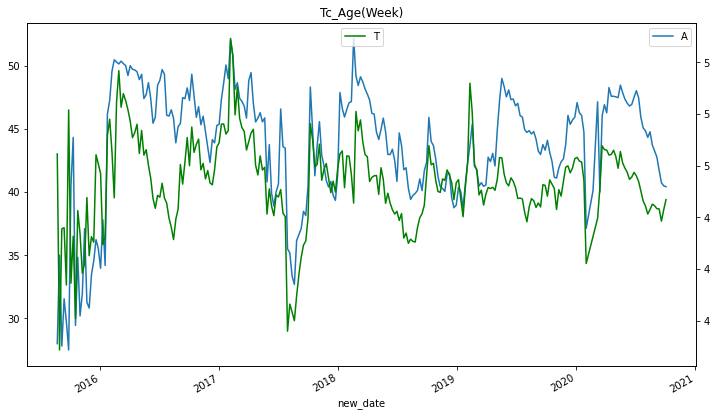

In [97]:
from matplotlib.ticker import FuncFormatter

fig,ax=plt.subplots(1,1,figsize=(9,6))
ax1 = ax.twinx()

@FuncFormatter
def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


Tc_Adult_Result["mean"].dropna().plot(ax=ax1,figsize=(12,6),style=['g-'])
ax1.legend(('Tc'),loc = 'upper center')

Tc_Adult_Age["mean"].dropna().plot(ax=ax,figsize=(12,7)) 
ax.legend('Age')
plt.title("Tc_Age(Week)")

In [102]:
Tc_Month = pd.DataFrame(Tc_new.groupby([Tc_new.index.month])["RESULT"].mean())
Tc_Month_Age = pd.DataFrame(Tc_new.groupby([Tc_new.index.month])["EXAMINEE_AGE"].mean())

Text(0.5, 1.0, 'Tc & Age(Month)')

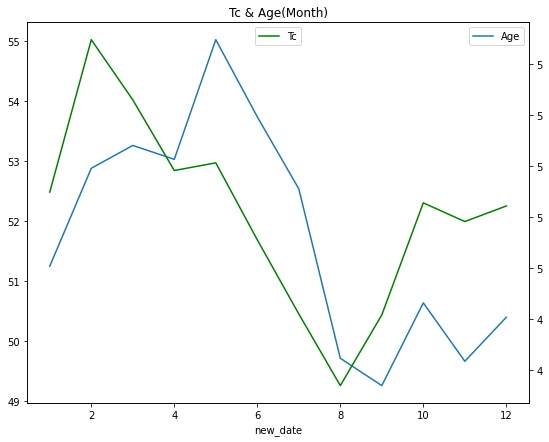

In [105]:
from matplotlib.ticker import FuncFormatter

fig,ax=plt.subplots(1,1,figsize=(9,6))
ax1 = ax.twinx()

@FuncFormatter
def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


Tc_Month.dropna().plot(ax=ax1,figsize=(9,6),style=['g-'])
ax1.legend(('Tc',),loc = 'upper center')

Tc_Month_Age.dropna().plot(ax=ax,figsize=(9,7)) 
ax.legend(('Age',))
plt.title("Tc & Age(Month)")

In [130]:
Tc_year = Tc_new[Tc_new.index.year.isin ([2017,2018,2019])]

In [131]:
Tc_year_select = pd.DataFrame(Tc_year.groupby([Tc_year.index])["RESULT"].mean())

In [132]:
Tc_age_select = pd.DataFrame(Tc_year.groupby([Tc_year.index])["EXAMINEE_AGE"].mean())

In [128]:
Tc_age_select.index

MultiIndex([(2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8),
            (2017,  9),
            (2017, 10),
            (2017, 11),
            (2017, 12),
            (2018,  1),
            (2018,  2),
            (2018,  3),
            (2018,  4),
            (2018,  5),
            (2018,  6),
            (2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12)],
           names=['new_date', 'new_date'])

In [133]:
Tc_year_select_month = pd.DataFrame(Tc_year_select.groupby([Tc_year_select.index.month])["RESULT"].mean())
Tc_age_select_month = pd.DataFrame(Tc_age_select.groupby([Tc_age_select.index.month])["EXAMINEE_AGE"].mean())

Text(0.5, 1.0, 'Tc & Age(Month)')

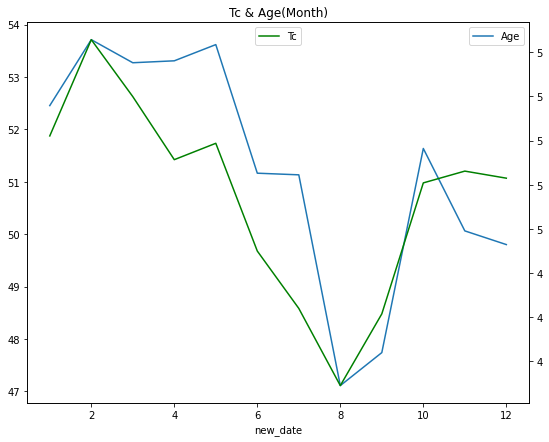

In [134]:
from matplotlib.ticker import FuncFormatter

fig,ax=plt.subplots(1,1,figsize=(9,6))
ax1 = ax.twinx()

@FuncFormatter
def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


Tc_year_select_month.dropna().plot(ax=ax1,figsize=(9,6),style=['g-'])
ax1.legend(('Tc',),loc = 'upper center')

Tc_age_select_month.dropna().plot(ax=ax,figsize=(9,7)) 
ax.legend(('Age',))
plt.title("Tc & Age(Month)")

In [139]:
shishi = Tc_year[["RESULT","EXAMINEE_AGE","EXAMINEE_GENDER"]]
shishi.to_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.shishi.pkl")

In [140]:
Tc_year.head()

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date,ValueRangeMean,Age_label
new_date,,,,,,,,,
2018-03-26,400753209582,34.00,5.85,2.80,52.0,M,2018-03-26,4.325,adult(20-55)
2019-04-27,5kh45ycc3q3d510,21.40,5.18,0.00,51.0,M,2019-04-27,2.590,adult(20-55)
2019-03-08,227933422939,19.05,5.60,2.33,58.0,MW,2019-03-08,3.965,senior(>55)
2019-05-31,457453925141,17.33,5.17,3.10,39.0,M,2019-05-31,4.135,adult(20-55)
2017-05-31,5kf53lsefyrbtn5,17.30,5.70,2.30,74.0,M,2017-05-31,4.000,senior(>55)


In [143]:
Tc_age_select_month_shishi = pd.DataFrame(Tc_age_select.groupby([Tc_age_select.index.month,Tc_age_select.index.year])["EXAMINEE_AGE"].mean())

In [146]:
test = Tc_age_select_month_shishi.unstack()

In [162]:
test.columns = ["2017","2018","2019"]

In [165]:
test["2017"]

new_date
1     55.976670
2     56.438001
3     55.629266
4     55.368519
5     53.070968
6     48.552635
7     51.425824
8     43.895087
9     44.443728
10    53.579108
11    52.329928
12    49.797277
Name: 2017, dtype: float64

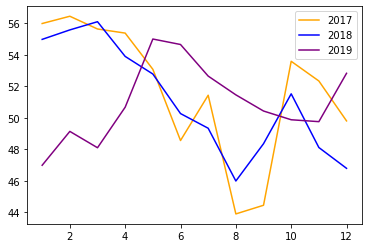

In [167]:
data = [test["2017"],test["2018"],test["2019"]]
colors = ["orange","blue","purple"]
label = ["2017","2018","2019"]

for i in range(0,3):
    plt.plot(data[i], color = colors[i],label = label[i])
    plt.legend()
plt.show()

#### 3.血脂的年龄标化

<AxesSubplot:xlabel='new_date'>

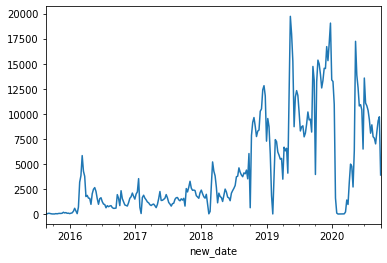

In [192]:
Tc_W["len"].plot()

In [193]:
Tc_W["len"].min()

0

In [196]:
Tc_W.loc[Tc_W.len <= 10,:]

,len,sum,mean
new_date,,,
2015-08-23,4,20.05,5.012500
2015-09-27,7,36.03,5.147143
2015-10-04,5,23.21,4.642000
2015-10-11,4,20.26,5.065000
2019-02-10,7,37.37,5.338571
2020-02-09,0,0.00,NaN
2020-02-16,0,0.00,NaN
2020-02-23,9,42.14,4.682222
2020-03-01,1,3.83,3.830000


In [195]:
Tc_W.sort_values(by = "len",ascending = True)

,len,sum,mean
new_date,,,
2020-02-16,0,0.000,NaN
2020-02-09,0,0.000,NaN
2020-03-01,1,3.830,3.830000
2015-10-11,4,20.260,5.065000
2015-08-23,4,20.050,5.012500
...,...,...,...
2019-12-22,17061,86569.416,5.074111
2020-05-17,17242,88743.832,5.146957
2019-05-26,17974,91258.989,5.077278


In [180]:
mean_ = Tc_W["mean"].mean()

In [182]:
Tc_W.loc[Tc_W["mean"] == Tc_W["mean"].min(),"mean"] = mean_

In [185]:
Tc_W = Tc_W["mean"]

In [186]:
Tc_W.to_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_W.xlsx")

In [191]:
Tc_W

,len,sum,mean
new_date,,,
2015-08-23,4,20.050,5.012500
2015-08-30,18,79.680,4.426667
2015-09-06,70,334.480,4.778286
2015-09-13,65,309.370,4.759538
2015-09-20,30,139.680,4.656000
...,...,...,...
2020-09-06,7004,34531.019,4.930185
2020-09-13,8206,40335.178,4.915328
2020-09-20,9292,45271.076,4.872049


In [188]:
Tc_new

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date,ValueRangeMean,Age_label
new_date,,,,,,,,,
2018-03-26,400753209582,34.000,5.85,2.80,52.0,M,2018-03-26,4.325,adult(20-55)
2020-01-03,007286487681,28.510,6.00,1.00,57.0,M,2020-01-03,3.500,senior(>55)
2020-06-21,088460718921,22.000,5.20,0.00,50.0,M,2020-06-21,2.600,adult(20-55)
2019-04-27,5kh45ycc3q3d510,21.400,5.18,0.00,51.0,M,2019-04-27,2.590,adult(20-55)
2020-01-03,163778112223,19.310,5.18,0.00,30.0,M,2020-01-03,2.590,adult(20-55)
...,...,...,...,...,...,...,...,...,...
2019-12-20,045934811268,0.015,5.18,0.00,53.0,M,2019-12-20,2.590,adult(20-55)
2019-07-29,885766010232,0.010,5.20,0.00,39.0,M,2019-07-29,2.600,adult(20-55)
2019-07-29,644101243722,0.010,5.20,0.00,68.0,M,2019-07-29,2.600,senior(>55)


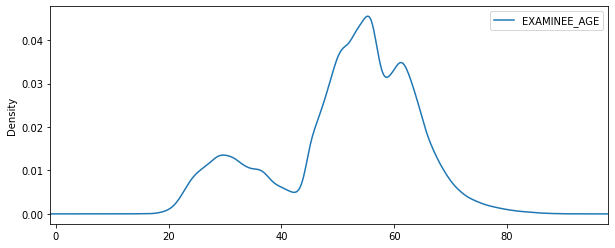

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
Tc_new.EXAMINEE_AGE.dropna().plot(kind='kde', xlim=(min(Tc_new.EXAMINEE_AGE)-1,max(Tc_new.EXAMINEE_AGE)+1),label = "EXAMINEE_AGE")
plt.legend()
plt.show()

In [217]:
Tc_SM = pd.DataFrame(Tc_new.RESULT.resample('SM').agg([len,sum,np.mean]))

In [ ]:
Age_SM = pd.DataFrame(Tc_new.RESULT.resample('SM').agg([len,sum,np.mean]))

In [212]:
Tc_SM

,len,sum,mean
new_date,,,
2016-01-31,403,2126.940,5.277767
2018-02-15,830,4308.500,5.190964
2016-01-15,855,4420.380,5.170035
2016-08-31,1322,6624.720,5.011135
2019-01-31,1590,8240.540,5.182730
...,...,...,...
2019-11-15,30985,156180.407,5.040517
2019-11-30,34885,176900.866,5.070972
2019-10-15,34922,174539.994,4.997995


<AxesSubplot:xlabel='new_date'>

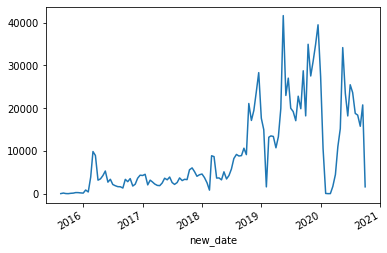

In [198]:
Tc_SM["len"].plot()

In [218]:
Tc_SM = Tc_SM[~Tc_SM.index.year.isin ([2015, 2020])]

<AxesSubplot:xlabel='new_date'>

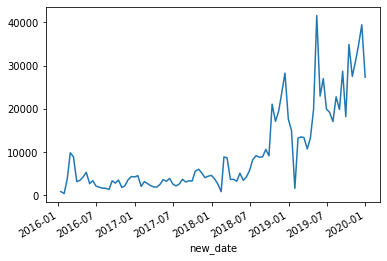

In [211]:
Tc_SM["len"].plot()

<AxesSubplot:xlabel='new_date'>

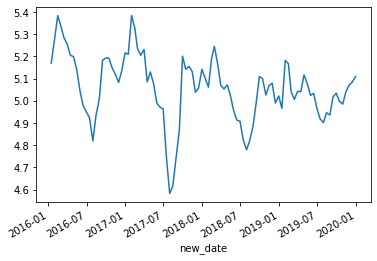

In [210]:
Tc_SM["mean"].plot()

In [223]:
Tc_SM.axes

[DatetimeIndex(['2016-01-15', '2016-01-31', '2016-02-15', '2016-02-29',
                '2016-03-15', '2016-03-31', '2016-04-15', '2016-04-30',
                '2016-05-15', '2016-05-31', '2016-06-15', '2016-06-30',
                '2016-07-15', '2016-07-31', '2016-08-15', '2016-08-31',
                '2016-09-15', '2016-09-30', '2016-10-15', '2016-10-31',
                '2016-11-15', '2016-11-30', '2016-12-15', '2016-12-31',
                '2017-01-15', '2017-01-31', '2017-02-15', '2017-02-28',
                '2017-03-15', '2017-03-31', '2017-04-15', '2017-04-30',
                '2017-05-15', '2017-05-31', '2017-06-15', '2017-06-30',
                '2017-07-15', '2017-07-31', '2017-08-15', '2017-08-31',
                '2017-09-15', '2017-09-30', '2017-10-15', '2017-10-31',
                '2017-11-15', '2017-11-30', '2017-12-15', '2017-12-31',
                '2018-01-15', '2018-01-31', '2018-02-15', '2018-02-28',
                '2018-03-15', '2018-03-31', '2018-04-15', '2018-

In [222]:
Tc_SM['2016-01-31']

KeyError: '2016-01-31'

In [257]:
Tc_new["2018-03-26":"2019-03-26"]

AssertionError: <class 'numpy.ndarray'>

In [235]:
Tc_SM1= Tc_SM.copy()

In [250]:
Tc_SM1.index

DatetimeIndex(['2016-01-15', '2016-01-31', '2016-02-15', '2016-02-29',
               '2016-03-15', '2016-03-31', '2016-04-15', '2016-04-30',
               '2016-05-15', '2016-05-31', '2016-06-15', '2016-06-30',
               '2016-07-15', '2016-07-31', '2016-08-15', '2016-08-31',
               '2016-09-15', '2016-09-30', '2016-10-15', '2016-10-31',
               '2016-11-15', '2016-11-30', '2016-12-15', '2016-12-31',
               '2017-01-15', '2017-01-31', '2017-02-15', '2017-02-28',
               '2017-03-15', '2017-03-31', '2017-04-15', '2017-04-30',
               '2017-05-15', '2017-05-31', '2017-06-15', '2017-06-30',
               '2017-07-15', '2017-07-31', '2017-08-15', '2017-08-31',
               '2017-09-15', '2017-09-30', '2017-10-15', '2017-10-31',
               '2017-11-15', '2017-11-30', '2017-12-15', '2017-12-31',
               '2018-01-15', '2018-01-31', '2018-02-15', '2018-02-28',
               '2018-03-15', '2018-03-31', '2018-04-15', '2018-04-30',
      

In [244]:
Tc_SM1['2016-01-15']

KeyError: '2016-01-15'

In [246]:
from datetime import datetime

Tc_SM1.index.to_pydatetime()

array([datetime.datetime(2016, 1, 15, 0, 0),
       datetime.datetime(2016, 1, 31, 0, 0),
       datetime.datetime(2016, 2, 15, 0, 0),
       datetime.datetime(2016, 2, 29, 0, 0),
       datetime.datetime(2016, 3, 15, 0, 0),
       datetime.datetime(2016, 3, 31, 0, 0),
       datetime.datetime(2016, 4, 15, 0, 0),
       datetime.datetime(2016, 4, 30, 0, 0),
       datetime.datetime(2016, 5, 15, 0, 0),
       datetime.datetime(2016, 5, 31, 0, 0),
       datetime.datetime(2016, 6, 15, 0, 0),
       datetime.datetime(2016, 6, 30, 0, 0),
       datetime.datetime(2016, 7, 15, 0, 0),
       datetime.datetime(2016, 7, 31, 0, 0),
       datetime.datetime(2016, 8, 15, 0, 0),
       datetime.datetime(2016, 8, 31, 0, 0),
       datetime.datetime(2016, 9, 15, 0, 0),
       datetime.datetime(2016, 9, 30, 0, 0),
       datetime.datetime(2016, 10, 15, 0, 0),
       datetime.datetime(2016, 10, 31, 0, 0),
       datetime.datetime(2016, 11, 15, 0, 0),
       datetime.datetime(2016, 11, 30, 0, 0),
      

In [247]:
Tc_SM1.index.between_time('2016-01-15','2016-02-15')

AttributeError: 'DatetimeIndex' object has no attribute 'between_time'

In [248]:
dt = Tc_SM1.index + pd.Timedelta(days= 15)

In [249]:
dt

DatetimeIndex(['2016-01-30', '2016-02-15', '2016-03-01', '2016-03-15',
               '2016-03-30', '2016-04-15', '2016-04-30', '2016-05-15',
               '2016-05-30', '2016-06-15', '2016-06-30', '2016-07-15',
               '2016-07-30', '2016-08-15', '2016-08-30', '2016-09-15',
               '2016-09-30', '2016-10-15', '2016-10-30', '2016-11-15',
               '2016-11-30', '2016-12-15', '2016-12-30', '2017-01-15',
               '2017-01-30', '2017-02-15', '2017-03-02', '2017-03-15',
               '2017-03-30', '2017-04-15', '2017-04-30', '2017-05-15',
               '2017-05-30', '2017-06-15', '2017-06-30', '2017-07-15',
               '2017-07-30', '2017-08-15', '2017-08-30', '2017-09-15',
               '2017-09-30', '2017-10-15', '2017-10-30', '2017-11-15',
               '2017-11-30', '2017-12-15', '2017-12-30', '2018-01-15',
               '2018-01-30', '2018-02-15', '2018-03-02', '2018-03-15',
               '2018-03-30', '2018-04-15', '2018-04-30', '2018-05-15',
      

In [279]:
Tc_SM1

,len,sum,mean
new_date,,,
2016-01-15,855,4420.380,5.170035
2016-01-31,403,2126.940,5.277767
2016-02-15,3872,20847.940,5.384282
2016-02-29,9850,52600.960,5.340199
2016-03-15,8930,47209.660,5.286636
...,...,...,...
2019-10-31,27511,137150.852,4.985310
2019-11-15,30985,156180.407,5.040517
2019-11-30,34885,176900.866,5.070972


In [253]:
Tc_SM1.index.to_period("W")

PeriodIndex(['2016-01-11/2016-01-17', '2016-01-25/2016-01-31',
             '2016-02-15/2016-02-21', '2016-02-29/2016-03-06',
             '2016-03-14/2016-03-20', '2016-03-28/2016-04-03',
             '2016-04-11/2016-04-17', '2016-04-25/2016-05-01',
             '2016-05-09/2016-05-15', '2016-05-30/2016-06-05',
             '2016-06-13/2016-06-19', '2016-06-27/2016-07-03',
             '2016-07-11/2016-07-17', '2016-07-25/2016-07-31',
             '2016-08-15/2016-08-21', '2016-08-29/2016-09-04',
             '2016-09-12/2016-09-18', '2016-09-26/2016-10-02',
             '2016-10-10/2016-10-16', '2016-10-31/2016-11-06',
             '2016-11-14/2016-11-20', '2016-11-28/2016-12-04',
             '2016-12-12/2016-12-18', '2016-12-26/2017-01-01',
             '2017-01-09/2017-01-15', '2017-01-30/2017-02-05',
             '2017-02-13/2017-02-19', '2017-02-27/2017-03-05',
             '2017-03-13/2017-03-19', '2017-03-27/2017-04-02',
             '2017-04-10/2017-04-16', '2017-04-24/2017-

In [256]:
pd.date_range(freq='M')

AttributeError: 'DatetimeIndex' object has no attribute 'date_range'

In [270]:
Tc_Recode.EXAM_DATE.astype(str)

0          2020-02-29 00:00:00
1          2020-01-12 00:00:00
2          2020-01-13 00:00:00
3          2020-01-14 00:00:00
4          2020-01-11 00:00:00
                  ...         
1236591    2017-06-07 09:00:00
1236592    2018-06-04 09:00:00
1236593    2017-01-18 09:00:00
1236594    2017-08-30 09:00:00
1236595    2017-03-29 00:00:00
Name: EXAM_DATE, Length: 1236596, dtype: object

In [271]:
Tc_Recode.EXAM_DATE = pd.to_datetime(Tc_Recode.EXAM_DATE, format = "%Y%m%d")

In [267]:
Tc_test = Tc_Recode.set_index('EXAM_DATE',drop=True)

In [273]:
Tc_Recode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236596 entries, 0 to 1236595
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ORDER_CODE       1236596 non-null  object        
 1   RESULT           1236596 non-null  float64       
 2   UPPER_VALUE      1236591 non-null  float64       
 3   LOWER_VALUE      1236591 non-null  float64       
 4   EXAM_DATE        1236532 non-null  datetime64[ns]
 5   EXAMINEE_AGE     1236042 non-null  float64       
 6   EXAMINEE_GENDER  1236042 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 66.0+ MB


In [282]:
Tc_SM1.index.to

DatetimeIndex(['2016-01-15', '2016-01-31', '2016-02-15', '2016-02-29',
               '2016-03-15', '2016-03-31', '2016-04-15', '2016-04-30',
               '2016-05-15', '2016-05-31', '2016-06-15', '2016-06-30',
               '2016-07-15', '2016-07-31', '2016-08-15', '2016-08-31',
               '2016-09-15', '2016-09-30', '2016-10-15', '2016-10-31',
               '2016-11-15', '2016-11-30', '2016-12-15', '2016-12-31',
               '2017-01-15', '2017-01-31', '2017-02-15', '2017-02-28',
               '2017-03-15', '2017-03-31', '2017-04-15', '2017-04-30',
               '2017-05-15', '2017-05-31', '2017-06-15', '2017-06-30',
               '2017-07-15', '2017-07-31', '2017-08-15', '2017-08-31',
               '2017-09-15', '2017-09-30', '2017-10-15', '2017-10-31',
               '2017-11-15', '2017-11-30', '2017-12-15', '2017-12-31',
               '2018-01-15', '2018-01-31', '2018-02-15', '2018-02-28',
               '2018-03-15', '2018-03-31', '2018-04-15', '2018-04-30',
      

In [283]:
# Tc_SM1['new_date'] = pd.to_datetime(Tc_SM1['new_date'])
data = Tc_SM1[(Tc_SM1.index >=pd.to_datetime('20180701')) & (Tc_SM1.index <= pd.to_datetime('20190831'))]

In [284]:
data

,len,sum,mean
new_date,,,
2018-07-15,8217,39649.010,4.825242
2018-07-31,9177,43859.161,4.779248
2018-08-15,8805,42440.472,4.820042
2018-08-31,8903,43509.454,4.887055
2018-09-15,10629,53058.225,4.991836
2018-09-30,9129,46652.008,5.110309
2018-10-15,21081,107519.712,5.100314
2018-10-31,17120,86046.858,5.026102
2018-11-15,19454,98615.403,5.069158


In [290]:
tlist = Tc_SM1.index.tolist()
tlist.insert(0,20160101)

In [291]:
tlist

[20160101,
 Timestamp('2016-01-15 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-15 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-15 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-15 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-15 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-15 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-15 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-15 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-15 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-15 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-15 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-15 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-15 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestam

In [4]:
Tc_Recode = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_new.pkl")

In [5]:
Tc_Recode.head()

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,new_date,ValueRangeMean,Age_label
new_date,,,,,,,,,
2018-03-26,400753209582,34.00,5.85,2.8,52.0,M,2018-03-26,4.325,adult(20-55)
2020-01-03,007286487681,28.51,6.00,1.0,57.0,M,2020-01-03,3.500,senior(>55)
2020-06-21,088460718921,22.00,5.20,0.0,50.0,M,2020-06-21,2.600,adult(20-55)
2019-04-27,5kh45ycc3q3d510,21.40,5.18,0.0,51.0,M,2019-04-27,2.590,adult(20-55)
2020-01-03,163778112223,19.31,5.18,0.0,30.0,M,2020-01-03,2.590,adult(20-55)


In [6]:
Tc_new = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_new.pkl")

In [24]:
Tc_new = Tc_new.loc[:,['EXAMINEE_AGE','RESULT']]

In [8]:
Tc_SM = pd.DataFrame(Tc_new.RESULT.resample('SM').agg([len,sum,np.mean]))

In [9]:
Tc_SM = Tc_SM[~Tc_SM.index.year.isin ([2015, 2020])]

In [45]:
Tc_new = Tc_new[~Tc_new.index.year.isin([2015,2020])]

In [29]:
DateNodeList = Tc_SM.index.tolist()
DateNodeList.insert(0,"2016-01-01")

In [30]:
len(DateNodeList)

97

In [61]:
T1

Timestamp('2016-01-31 00:00:00')

In [59]:
Tc_new_age_count.join(Data)

,count,percentage,RESULT
EXAMINEE_AGE,,,
"(19.999, 25.0]",29597,3.275892,4.477500
"(25.0, 30.0]",61033,6.755331,4.427500
"(30.0, 35.0]",56445,6.247517,4.795000
"(35.0, 40.0]",39665,4.390251,5.165000
"(40.0, 45.0]",34321,3.798760,5.166000
"(45.0, 50.0]",120045,13.286972,5.045405
"(50.0, 55.0]",186526,20.645306,5.171875
"(55.0, 60.0]",161149,17.836496,5.342535
"(60.0, 65.0]",137830,15.255474,5.428293


In [6]:
AgeBins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
Tc_new_age_cut = pd.DataFrame(pd.cut(Tc_new["EXAMINEE_AGE"],bins = AgeBins,include_lowest = True))
Tc_new_age_count = pd.DataFrame(Tc_new_age_cut.groupby(['EXAMINEE_AGE'])['EXAMINEE_AGE'].count())
Tc_new_age_count.columns = ["count"]
Tc_new_age_count["percentage"] = (Tc_new_age_count['count']/Tc_new_age_count['count'].sum(axis = 0))

In [7]:
DateList = []
AdjustTcList = []

for i in range(1,len(DateNodeList)):
    T1 = pd.to_datetime(DateNodeList[i-1])
    T2 = pd.to_datetime(DateNodeList[i])    
    data = Tc_new[(Tc_new.index >=T1) & (Tc_new.index <= T2)]
    data_age_cut = pd.DataFrame(pd.cut(data['EXAMINEE_AGE'],bins = AgeBins,include_lowest = True))
    data_age_cut["RESULT"] = data.RESULT
    Data = pd.DataFrame(data_age_cut.groupby(['EXAMINEE_AGE'])["RESULT"].mean())
    Data = Data.join(Tc_new_age_count)
    Data["Tc"] = Data['RESULT']* Data['percentage']
    Data["Tc"] = Data["Tc"].fillna(method='bfill')    
    AdjustTc = Data["Tc"].sum(axis = 0)
    Data["AdjustTc"] = Data["Tc"].sum(axis = 0)
    Data["Date1"] = T1
    Data["Date1_"] =  Data["Date1"].dt.date
    Data["Date2"] = T2
    Data["Date2_"] = Data["Date2"].dt.date
#     Data['Date'] = Data.Date1_.dt.date.str.cat(Data.Date2_.dt.date,',',na_rep = "Missing")
#     DateList.append(set(Data["Date2"].dt.date))
    DateList.append(T2)
    AdjustTcList.append(AdjustTc)
AdjustTc = pd.DataFrame({"Date":DateList,"Adjust_Tc":AdjustTcList})
AdjustTc = AdjustTc.set_index("Date")

<AxesSubplot:xlabel='Date'>

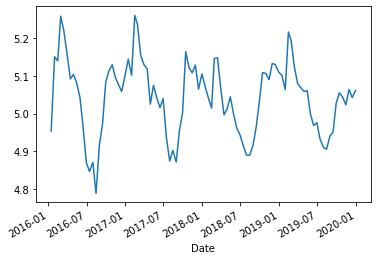

In [113]:
AdjustTc['Adjust_Tc'].plot()

In [103]:
AdjustTc

,Date,Adjust_Tc
0,2016-01-15,4.953632
1,2016-01-31,5.151134
2,2016-02-15,5.140203
3,2016-02-29,5.259208
4,2016-03-15,5.220182
...,...,...
91,2019-10-31,5.043046
92,2019-11-15,5.023448
93,2019-11-30,5.064278
94,2019-12-15,5.042682


In [39]:
test = pd.DataFrame(data_age_cut)
test["RESULT"] = data.RESULT

### 时间序列分析

In [2]:
from scipy import  stats
import statsmodels.api as sm  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Tc_new = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201116.Tc_new.pkl")
Tc_new = Tc_new.loc[:,['EXAMINEE_AGE','RESULT']]
Tc_SM = pd.DataFrame(Tc_new.RESULT.resample('SM').agg([len,sum,np.mean]))
Tc_SM = Tc_SM[~Tc_SM.index.year.isin ([2015, 2020])]

In [4]:
Tc_new = Tc_new[~Tc_new.index.year.isin([2015,2020])]
DateNodeList = Tc_SM.index.tolist()
DateNodeList.insert(0,"2016-01-01")

In [5]:
AgeBins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
Tc_new_age_cut = pd.DataFrame(pd.cut(Tc_new["EXAMINEE_AGE"],bins = AgeBins,include_lowest = True))
Tc_new_age_count = pd.DataFrame(Tc_new_age_cut.groupby(['EXAMINEE_AGE'])['EXAMINEE_AGE'].count())
Tc_new_age_count.columns = ["count"]
Tc_new_age_count["percentage"] = (Tc_new_age_count['count']/Tc_new_age_count['count'].sum(axis = 0))

In [6]:
DateList = []
AdjustTcList = []

for i in range(1,len(DateNodeList)):
    T1 = pd.to_datetime(DateNodeList[i-1])
    T2 = pd.to_datetime(DateNodeList[i])    
    data = Tc_new[(Tc_new.index >=T1) & (Tc_new.index <= T2)]
    data_age_cut = pd.DataFrame(pd.cut(data['EXAMINEE_AGE'],bins = AgeBins,include_lowest = True))
    data_age_cut["RESULT"] = data.RESULT
    Data = pd.DataFrame(data_age_cut.groupby(['EXAMINEE_AGE'])["RESULT"].mean())
    Data = Data.join(Tc_new_age_count)
    Data["Tc"] = Data['RESULT']* Data['percentage']
    Data["Tc"] = Data["Tc"].fillna(method='bfill')    
    AdjustTc = Data["Tc"].sum(axis = 0)
    Data["AdjustTc"] = Data["Tc"].sum(axis = 0)
    Data["Date1"] = T1
    Data["Date1_"] =  Data["Date1"].dt.date
    Data["Date2"] = T2
    Data["Date2_"] = Data["Date2"].dt.date
#     Data['Date'] = Data.Date1_.dt.date.str.cat(Data.Date2_.dt.date,',',na_rep = "Missing")
#     DateList.append(set(Data["Date2"].dt.date))
    DateList.append(T2)
    AdjustTcList.append(AdjustTc)
AdjustTc = pd.DataFrame({"Date":DateList,"Adjust_Tc":AdjustTcList})
AdjustTc = AdjustTc.set_index("Date")

In [9]:
AdjustTc.to_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201123Adjust_Tc.xlsx")

<AxesSubplot:xlabel='Date'>

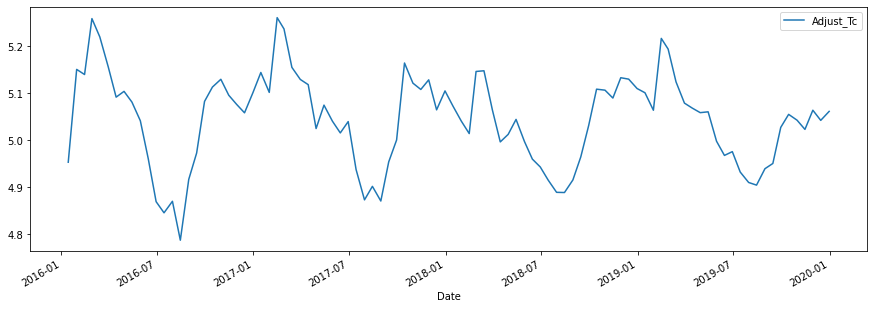

In [10]:
# 1.数据概览
AdjustTc.plot(figsize=(15,5))

In [12]:
# 2.平稳性检验 单位根检验（ADF、DF、PP） 如果序列是平稳的，则不存在单位根， 否则就会存在单位根
from statsmodels.tsa.stattools import adfuller

adfuller(AdjustTc)      

(-4.938178090839729,
 2.9373303630925468e-05,
 10,
 85,
 {'1%': -3.5097356063504983,
  '5%': -2.8961947486260944,
  '10%': -2.5852576124567475},
 -254.49728002289157)

<Figure size 432x288 with 0 Axes>

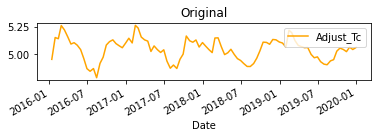

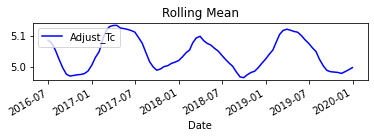

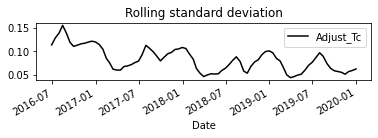

In [44]:
# 移动平均图
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeseries.rolling(window=size).mean()
    rol_std = timeseries.rolling(window=size).std()
 #     plt.plot(timeseries,color='blue', label='Original')
#     plt.plot(rol_mean,color='red', label='Rolling Mean')
#     plt.plot(rol_std,color='black', label='Rolling standard deviation')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
    data = [timeseries,rol_mean,rol_std]
    colors = ["orange","blue","black"]
    title= ['Original','Rolling Mean','Rolling standard deviation']

    plt.figure()

    for i in range(0,3):
        ax = plt.subplot(3,1,i+1)
        data[i].dropna().plot(ax = ax, color = colors[i])
        plt.title(title[i])
        plt.legend()
        plt.show()

draw_trend(AdjustTc,12)

In [13]:
from statsmodels.stats.diagnostic import unitroot_adf

unitroot_adf(AdjustTc)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:62: FutureWarning: unitroot_adf is deprecated and will be removed after 0.11.
  FutureWarning)


(0.12518585048260208,
 0.7243416190024206,
 0,
 95,
 {'1%': -2.589676620498615,
  '5%': -1.9441638046362444,
  '10%': -1.6142953474267385},
 -240.94970362891092)

In [ ]:
# 非平稳序列的处理

#1.差分
def stationarity(timeseries): 
    
    diff1 = timeseries.diff(1).dropna() 
    diff2 = diff1.diff(1) 
    
    diff1.plot(color = 'red',title='diff 1',figsize=(10,4))
    diff2.plot(color = 'black',title='diff 2',figsize=(10,4))
    
# 2.平滑法
rolmean = timeseries.rolling(window=4,center = False).mean() #滚动平均
rolstd = timeseries.rolling(window=4,center = False).std()#滚动标准差 

rolmean.plot(color = 'yellow',title='Rolling Mean',figsize=(10,4))
rolstd.plot(color = 'blue',title='Rolling Std',figsize=(10,4))

# 3.对数变换
ts_log = np.log(ts)

# 4.分解 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(timeseries):
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    Data = [timeseries,trend,seasonal,residual]
    color = ['red', 'black', 'orange','green']
    title = ["timeseries",'trend',"seasonal",'residual']

    # 画子图
    plt.figure(figsize = (12,10))
    for i in range(0,4):
        ax = plt.subplot(2,2,i+1)
        Data[i].plot(ax = ax,color = color[i])
        plt.title(title[i])
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    return trend , seasonal, residual

trend , seasonal, residual = decompose(AdjustTc)

residual.dropna(inplace=True)
draw_trend(residual,12)
teststationarity(residual)

In [22]:
# 2.白噪声检验（纯随机性检验）, 白噪声序列，随机产生的序列，不具有时间上的相关性
from statsmodels.stats.diagnostic import acorr_ljungbox

p_value = acorr_ljungbox(AdjustTc, lags=1) 
print (p_value)

(array([64.75223109]), array([8.49333943e-16]))


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


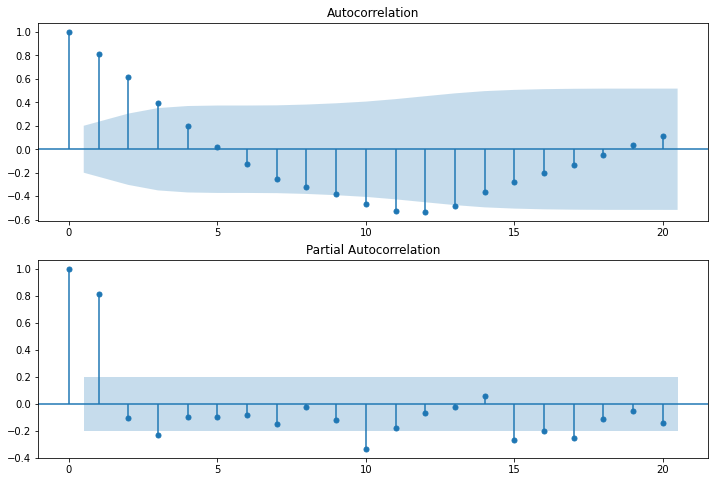

In [20]:
# 3.时间序列定阶
## 3.1 ACF和PACF定阶

fig = plt.figure(figsize=(12, 8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(AdjustTc,ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(AdjustTc,ax=ax2)


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fai

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been 

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodel

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodel

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fai

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fai

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been 

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fai

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fai

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been 

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization fai

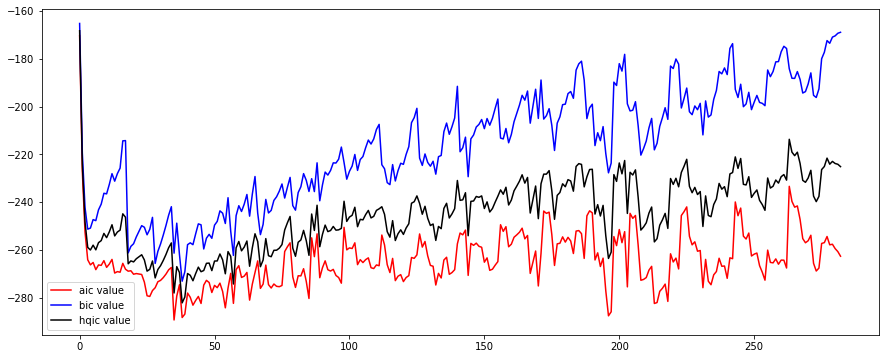

In [103]:
# 3.2调试最佳参数
from statsmodels.tsa.arima_model import ARMA

p_value = []
q_value = []
aicList = []
bicList= []
hqicList = []

for p in range(0,20):
    for q in range(0,20):
        model = ARMA(AdjustTc, order=(p, q)) 
        try:
            results_ARMA = model.fit(disp=-1, method='css')
        except:
            continue
        bic = results_ARMA.bic
        aicList.append(results_ARMA.aic)
        bicList.append(results_ARMA.bic)
        hqicList.append(results_ARMA.hqic)
        p_value.append(p)
        q_value.append(q)
        
df = pd.DataFrame({'p':p_value,'q':q_value,'aic':aicList,'bic':bicList,'hqic':hqicList})

plt.figure(figsize=(15,6))
plt.plot(aicList,'r',label='aic value')
plt.plot(bicList,'b',label='bic value')
plt.plot(hqicList,'k',label='hqic value')
plt.legend(loc=0)

aic_min = df.loc[df.aic== df.aic.min(),:]
bic_min = df.loc[df.bic== df.bic.min(),:]
hq_max = df.loc[df.hqic== df.hqic.max(),:]

In [106]:
aic_min

,p,q,aic,bic,hqic
35,2,7,-289.365098,-261.388855,-278.064744


In [107]:
bic_min

,p,q,aic,bic,hqic
38,3,1,-288.333601,-273.138004,-282.198054


In [108]:
hq_min = df.loc[df.hqic== df.hqic.min(),:]
hq_min

,p,q,aic,bic,hqic
38,3,1,-288.333601,-273.138004,-282.198054


In [32]:
#AIC
AIC = sm.tsa.arma_order_select_ic(AdjustTc,\
    max_ar=10,max_ma=10,ic='aic')['aic_min_order']
#BIC
BIC = sm.tsa.arma_order_select_ic(AdjustTc,max_ar=10,\
       max_ma=10,ic='bic')['bic_min_order']
#HQIC
HQIC = sm.tsa.arma_order_select_ic(AdjustTc,max_ar=10,\
             max_ma=10,ic='hqic')['hqic_min_order']

print('the AIC is{},\nthe BIC is{}\n the HQIC is{}'.format(AIC,BIC,HQIC))

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaco

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

the AIC is(10, 8),
the BIC is(2, 1)
 the HQIC is(2, 1)


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodel

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, b

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodel

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInvers

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\mode

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Va

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodel

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. foreca

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodel

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

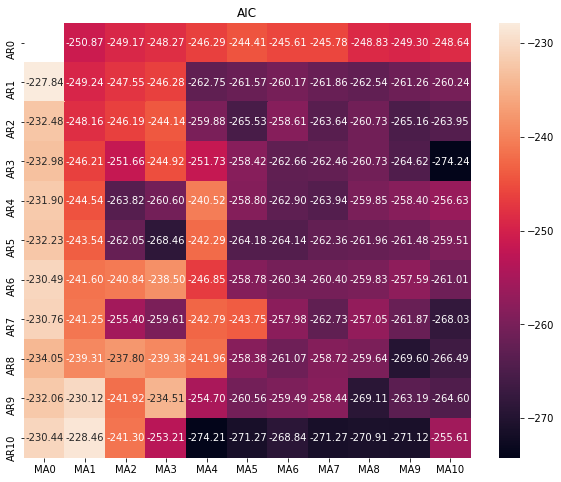

In [28]:
## 3.3 热力图定阶
#设置遍历循环的初始条件，以热力图的形式展示，跟AIC定阶作用一样

import seaborn as sns #热力图
import itertools 

p_min = 0
q_min = 0
p_max = 10
q_max = 10
d_min = 0
d_max = 10
# 创建Dataframe,以BIC准则
results_aic = pd.DataFrame(index=['AR{}'.format(i) \
                           for i in range(p_min,p_max+1)],\
        columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
# itertools.product 返回p,q中的元素的笛卡尔积的元组
for p,d,q in itertools.product(range(p_min,p_max+1),\
                               range(d_min,d_max+1),range(q_min,q_max+1)):
    if p==0 and q==0:
        results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.ARIMA(AdjustTc, order=(p, d, q))
        results = model.fit()
        #返回不同pq下的model的BIC值
        results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.aic
    except:
        continue
results_aic = results_aic[results_aic.columns].astype(float)
#print(results_bic)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_aic,
             #mask=results_aic.isnull(),
             ax=ax,
             annot=True, #将数字显示在热力图上
             fmt='.2f',
             )
ax.set_title('AIC')
plt.show() 
    

In [9]:
# 4.构建模型和预测
## 4.1 ARMA模型构建

from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA

from statsmodels.stats.stattools import durbin_watson 
from statsmodels.graphics.api import qqplot

In [67]:
def Resampling(timeserise): 
    df = timeserise
    data = df['2016-1-1':'2019-01-01'] 
    test = df['2019-01-01':'2019-12-31']
    data_train = data.resample('SM').mean()  
    data_test = test.resample('SM').mean()
 
    return data_train,data_test

data_train,data_test = Resampling(AdjustTc)

In [33]:
pred.values

array([5.04435529, 4.97142263, 5.15624513, 5.1505295 , 5.24259118,
       5.20212968, 5.13388091, 5.06981297, 5.07308255, 5.05355375,
       5.01976899, 4.95614058, 4.88697565, 4.87606228, 4.90833078,
       4.85987654, 4.97010384, 5.03000263, 5.11996666, 5.14570981,
       5.15286753, 5.12042126, 5.09798126, 5.07962347, 5.10815708,
       5.1377669 , 5.10118285, 5.21040269, 5.18720484, 5.11037255,
       5.07743349, 5.06169622, 4.98777501, 5.02018594, 4.99774846,
       4.97846144, 4.9976632 , 4.92651141, 4.88167324, 4.91244722,
       4.90382866, 4.97616554, 5.02328591, 5.14860779, 5.11935984,
       5.09993117, 5.10840663, 5.05685937, 5.07977349, 5.05473875,
       5.02701564, 5.00615482, 5.10229851, 5.10486567, 5.03678728,
       4.98045204, 4.99144536, 5.01862048, 4.9874122 , 4.96134169,
       4.95386506, 4.94114463, 4.93109192, 4.94157829, 4.97335629,
       5.02070113, 5.07817881, 5.13888616, 5.13693817, 5.11895391,
       5.14439771, 5.13752883])

                              ARMA Model Results                              
Dep. Variable:              Adjust_Tc   No. Observations:                   72
Model:                     ARMA(3, 1)   Log Likelihood                 106.787
Method:                       css-mle   S.D. of innovations              0.053
Date:                Thu, 26 Nov 2020   AIC                           -201.573
Time:                        09:52:45   BIC                           -187.913
Sample:                    01-15-2016   HQIC                          -196.135
                         - 12-31-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0444      0.003   1501.553      0.000       5.038       5.051
ar.L1.Adjust_Tc     1.7029      0.124     13.735      0.000       1.460       1.946
ar.L2.Adjust_Tc    -0.7169      

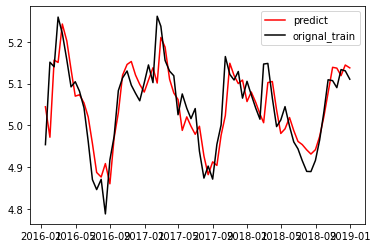

In [35]:
import sklearn.metrics 

arma_model = ARMA(data_train,(3,1)) 
result = arma_model.fit()
pred = result.predict()

plt.plot(pred,color = "red", label = "predict")
plt.plot(data_train,color = "black",label = "orignal_train")
plt.legend(loc=0)

data_train_result = data_train['Adjust_Tc'].values
pred_result = pred.values

print(result.summary())
print('均方误差为{}'.format(sklearn.metrics.mean_squared_error(data_train_result,pred_result)))
print('平均绝对误差为{}'.format(sklearn.metrics.mean_absolute_error(data_train_result,pred_result)))
print('决定系数（R2）为{}'.format(sklearn.metrics.r2_score(data_train_result,pred_result)))

In [19]:
data_train_result = data_train['Adjust_Tc'].values

In [20]:
data_train_result

array([4.95363155, 5.15113373, 5.14020268, 5.25920807, 5.22018205,
       5.15652198, 5.09209086, 5.10438859, 5.08161879, 5.04182006,
       4.9613506 , 4.86967677, 4.84597593, 4.87049252, 4.7876997 ,
       4.91709178, 4.97321554, 5.08300608, 5.11353982, 5.13007144,
       5.09619086, 5.07666186, 5.05872016, 5.10171666, 5.14456068,
       5.10219199, 5.26122098, 5.23722342, 5.15545654, 5.12973885,
       5.11868373, 5.02527222, 5.07509681, 5.04101492, 5.01596459,
       5.04007923, 4.93801786, 4.87353474, 4.90228461, 4.87105905,
       4.95427768, 5.00094646, 5.16468878, 5.1218565 , 5.10843415,
       5.12886757, 5.06504568, 5.10535218, 5.07325786, 5.04102277,
       5.01457373, 5.14673194, 5.14819561, 5.06492607, 4.99683084,
       5.01283857, 5.04471724, 4.99758932, 4.96023202, 4.94352416,
       4.91564363, 4.88956991, 4.88910996, 4.91589477, 4.96494149,
       5.03172395, 5.10906168, 5.10693651, 5.09017142, 5.13341923,
       5.13039848, 5.11041819])

D-W检验值为2.0830424573794417
            AC          Q  Prob(>Q)
lag                                
1.0  -0.062397   0.292171  0.588832
2.0   0.083673   0.825057  0.661974
3.0  -0.049951   1.017723  0.796964
4.0  -0.037887   1.130192  0.889453
5.0  -0.066007   1.476670  0.915746
6.0   0.058548   1.753396  0.940925
7.0  -0.013675   1.768724  0.971526
8.0   0.043842   1.928741  0.983119
9.0   0.163935   4.201566  0.897652
10.0  0.000370   4.201578  0.937796
11.0 -0.067110   4.594960  0.949187
12.0 -0.105195   5.577627  0.935861
13.0 -0.180297   8.513172  0.808638
14.0  0.138108  10.265345  0.742538
15.0 -0.031943  10.360724  0.796457
16.0  0.069195  10.816270  0.820681
17.0 -0.019348  10.852534  0.864126
18.0 -0.029711  10.939633  0.896901
19.0 -0.069490  11.425071  0.908711
20.0 -0.197839  15.435445  0.750973
21.0 -0.094644  16.371239  0.748443
22.0 -0.051779  16.656931  0.782001
23.0  0.103195  17.814869  0.767452
24.0 -0.034737  17.948805  0.805485
25.0  0.310232  28.859206  0.269844
26

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([ 0.29217143,  0.82505652,  1.01772296,  1.13019189,  1.47666964,
         1.7533959 ,  1.76872397,  1.9287413 ,  4.20156627,  4.20157804,
         4.5949595 ,  5.57762737,  8.51317249, 10.26534523, 10.36072398,
        10.81626954, 10.85253383, 10.93963343, 11.42507128, 15.43544475]),
 array([0.58883237, 0.66197449, 0.79696363, 0.88945282, 0.91574633,
        0.94092502, 0.97152612, 0.98311904, 0.89765192, 0.93779556,
        0.94918706, 0.935861  , 0.80863765, 0.74253777, 0.79645696,
        0.82068144, 0.86412643, 0.89690078, 0.90871078, 0.75097296]))

<Figure size 864x576 with 0 Axes>

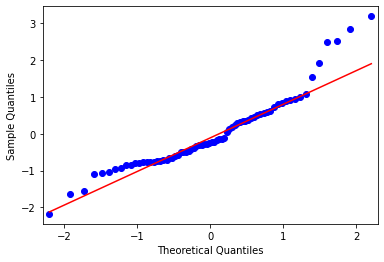

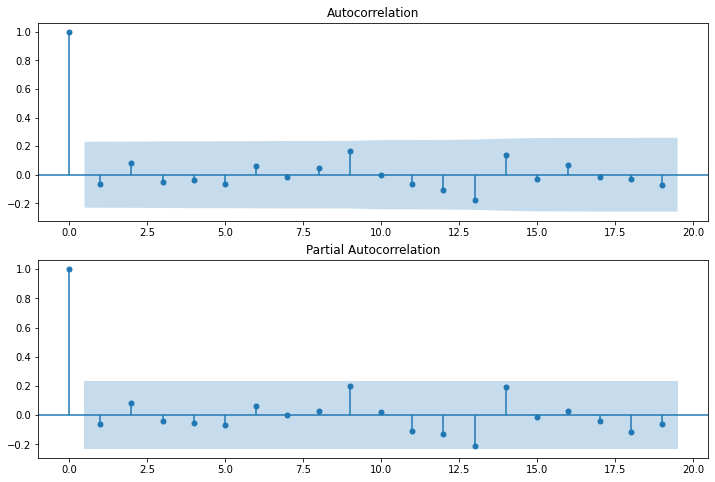

In [77]:
#残差检验（正态+自相关）
resid = result.resid 
plt.figure(figsize=(12,8))
qqplot(resid,line='q',fit=True)

print('D-W检验值为{}'.format(durbin_watson(resid.values)))


fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,ax=ax2)

r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

p_value = acorr_ljungbox(resid, lags=20) 
p_value

均方误差为0.0034246657068747488
平均绝对误差为0.04520484829487337
决定系数（R2）为0.4399495660214132


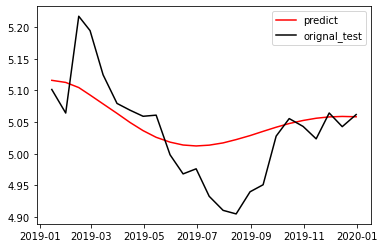

In [95]:
# 样本外的预测代码   
pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                          dynamic=True)

# print(pred_one)
# print(len(data_test))

plt.plot(pred_one,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.legend(loc=0)

data_test_result = data_test.Adjust_Tc
pred_one_result = pred_one.Adjust_Tc

print('均方误差为{}'.format(skm.mean_squared_error(data_test_result,pred_one_result)))
print('平均绝对误差为{}'.format(skm.mean_absolute_error(data_test_result,pred_one_result)))
print('决定系数（R2）为{}'.format(skm.r2_score(data_test_result,pred_one_result)))

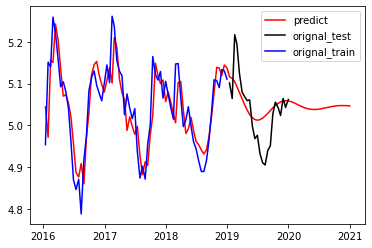

In [105]:
pred_two = result.predict(start= "2016-01-15",end =" 2020-12-31")

plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

### 20201126

In [3]:
AdjustTc = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201123Adjust_Tc.xlsx")

In [5]:
AdjustTc.head()

,Date,Adjust_Tc
0,2016-01-15,4.953632
1,2016-01-31,5.151134
2,2016-02-15,5.140203
3,2016-02-29,5.259208
4,2016-03-15,5.220182


<AxesSubplot:>

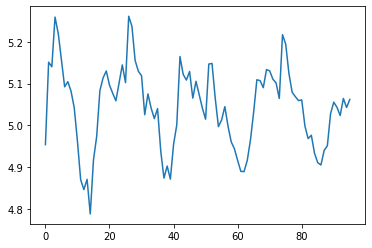

In [7]:
import matplotlib.pyplot as plt
AdjustTc.Adjust_Tc.plot()

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:

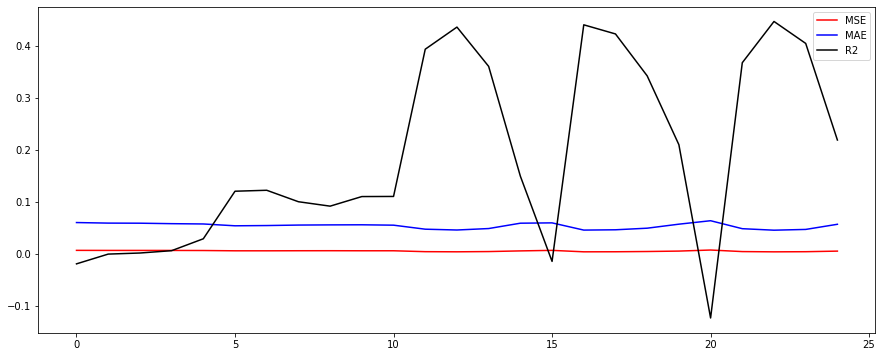

In [13]:
import sklearn.metrics
import matplotlib.pyplot as plt

p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

for p in range(0,5):
    for q in range(0,5):
        arma_model = ARMA(data_train,(p,q))  
        result = arma_model.fit()
        pred = result.predict()
        pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                          dynamic=True)   
        data_test_result = data_test['Adjust_Tc'].values
        pred_one_result = pred_one.values
        
        MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
        MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
        R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)
        
        MSEList.append(MSE)
        MAEList.append(MAE)
        R2List.append(R2)
        p_value.append(p)
        q_value.append(q)
        
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_min = df.loc[df.R2== df.R2.min(),:]

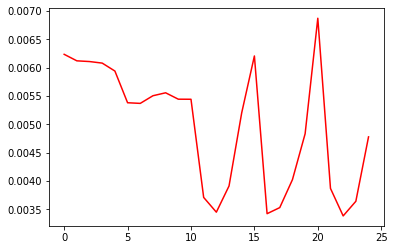

In [36]:
plt.plot(MSEList,'r',label='MSE')

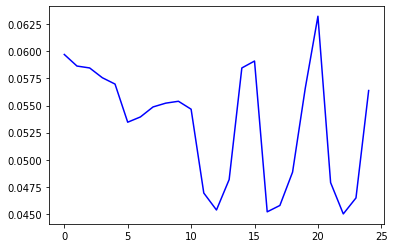

In [35]:
plt.plot(MAEList,'b',label='MAE')

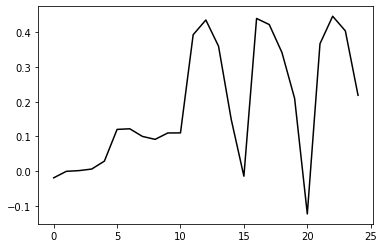

In [33]:
plt.plot(R2List,'k',label='R2')

In [14]:
MSE_min

,p,q,MSE,MAE,R2
22,4,2,0.003385,0.045013,0.446393


In [15]:
MAE_min

,p,q,MSE,MAE,R2
22,4,2,0.003385,0.045013,0.446393


In [16]:
R2_min

,p,q,MSE,MAE,R2
20,4,0,0.006872,0.063225,-0.123794


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


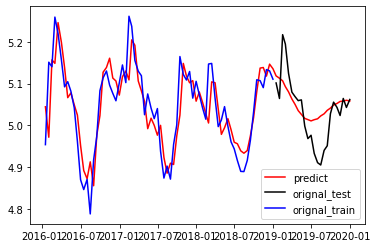

In [68]:
arma_model = ARMA(data_train,(4,2))  
result = arma_model.fit()
pred = result.predict()
# pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
#                   dynamic=True) 

pred_two = result.predict(start= "2016-01-15",end =" 2019-12-31")

plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\mode

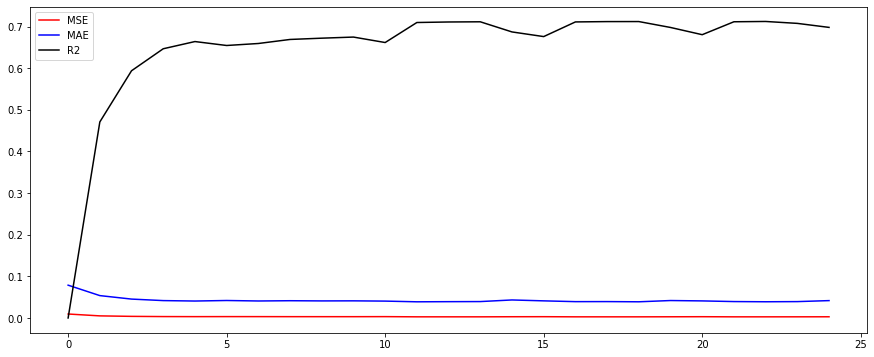

In [38]:
import sklearn.metrics
import matplotlib.pyplot as plt

p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

for p in range(0,5):
    for q in range(0,5):
        arma_model = ARMA(AdjustTc,(p,q))  
        result = arma_model.fit()
        pred = result.predict()
#         pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
#                           dynamic=True)   
        data_result = AdjustTc['Adjust_Tc'].values
        pred_result = pred.values
        
        MSE = sklearn.metrics.mean_squared_error(data_result,pred_result)
        MAE = sklearn.metrics.mean_absolute_error(data_result,pred_result)
        R2 = sklearn.metrics.r2_score(data_result,pred_result)
        
        MSEList.append(MSE)
        MAEList.append(MAE)
        R2List.append(R2)
        p_value.append(p)
        q_value.append(q)
        
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_min = df.loc[df.R2== df.R2.min(),:]

In [39]:
MSE_min

,p,q,MSE,MAE,R2
22,4,2,0.002741,0.038937,0.712189


In [40]:
MAE_min

,p,q,MSE,MAE,R2
11,2,1,0.002765,0.038835,0.70969


In [41]:
R2_min

,p,q,MSE,MAE,R2
0,0,0,0.009523,0.078773,-2.220446e-16


In [57]:
arma_model = ARMA(AdjustTc,(4,2))  
result = arma_model.fit()
pred = result.predict()
pred_one = result.predict(start= "2019-12-31",end ="2020-12-31") 

pred_two = result.predict(start= "2016-01-15",end =" 2019-12-31")

plt.plot(pred_two,color = "red", label = "predict")
plt.plot(AdjustTc,color = "black",label = "orignal_data")
plt.plot(pred_one,color = "blue", label = "predict_2020")
plt.legend(loc=0)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [ ]:
import sklearn.metrics
import matplotlib.pyplot as plt
import itertools

p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

p_min = 0
q_min = 0
p_max = 5
q_max = 5

for p,q in itertools.product(range(p_min,p_max+1),range(q_min,q_max+1)):
    try:
        arma_model = ARMA(data_train,(p,q))  
        result = arma_model.fit()
        pred = result.predict()
        pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                          dynamic=True)
        
        data_test_result = data_test['Adjust_Tc'].values
        pred_one_result = pred_one.values

        MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
        MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
        R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)


        MSEList.append(MSE)
        MAEList.append(MAE)
        R2List.append(R2)
        p_value.append(p)
        q_value.append(q)
    except:
        continue
        
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_min = df.loc[df.R2== df.R2.min(),:]

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\13670\Anacond

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\sit

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retval

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

### 2020.11.30

In [15]:
AdjustTc = AdjustTc.set_index('Date',drop = True)

In [21]:
AdjustTc.axes

[DatetimeIndex(['2016-01-15', '2016-01-31', '2016-02-15', '2016-02-29',
                '2016-03-15', '2016-03-31', '2016-04-15', '2016-04-30',
                '2016-05-15', '2016-05-31', '2016-06-15', '2016-06-30',
                '2016-07-15', '2016-07-31', '2016-08-15', '2016-08-31',
                '2016-09-15', '2016-09-30', '2016-10-15', '2016-10-31',
                '2016-11-15', '2016-11-30', '2016-12-15', '2016-12-31',
                '2017-01-15', '2017-01-31', '2017-02-15', '2017-02-28',
                '2017-03-15', '2017-03-31', '2017-04-15', '2017-04-30',
                '2017-05-15', '2017-05-31', '2017-06-15', '2017-06-30',
                '2017-07-15', '2017-07-31', '2017-08-15', '2017-08-31',
                '2017-09-15', '2017-09-30', '2017-10-15', '2017-10-31',
                '2017-11-15', '2017-11-30', '2017-12-15', '2017-12-31',
                '2018-01-15', '2018-01-31', '2018-02-15', '2018-02-28',
                '2018-03-15', '2018-03-31', '2018-04-15', '2018-

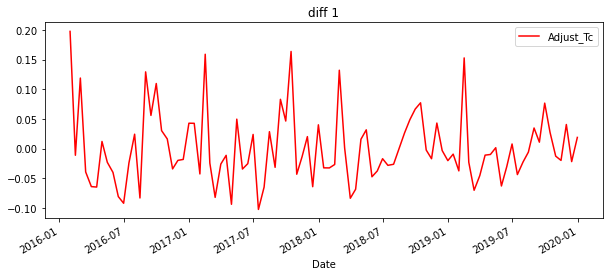

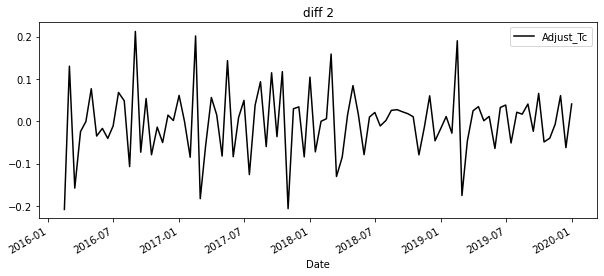

In [38]:
def stationarity(timeseries): 
    
    diff1 = timeseries.diff(1).dropna() 
    diff2 = diff1.diff(1).dropna() 
    
    diff1.plot(color = 'red',title='diff 1',figsize=(10,4))
    diff2.plot(color = 'black',title='diff 2',figsize=(10,4))
    return diff1,diff2
    
diff1,diff2 = stationarity(AdjustTc)

In [40]:
diff1

,Adjust_Tc
Date,
2016-02-15,-0.208433
2016-02-29,0.129936
2016-03-15,-0.158031
2016-03-31,-0.024634
2016-04-15,-0.000771
...,...
2019-10-31,-0.040105
2019-11-15,-0.007203
2019-11-30,0.060429


In [58]:
def Resampling(timeserise): 
    df = timeserise
    data = df['2016-1-1':'2019-01-01'] 
    test = df['2019-01-01':'2019-12-31']
    data_train = data.resample('SM').mean()  
    data_test = test.resample('SM').mean()
 
    return data_train,data_test

data_train,data_test = Resampling(diff1)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

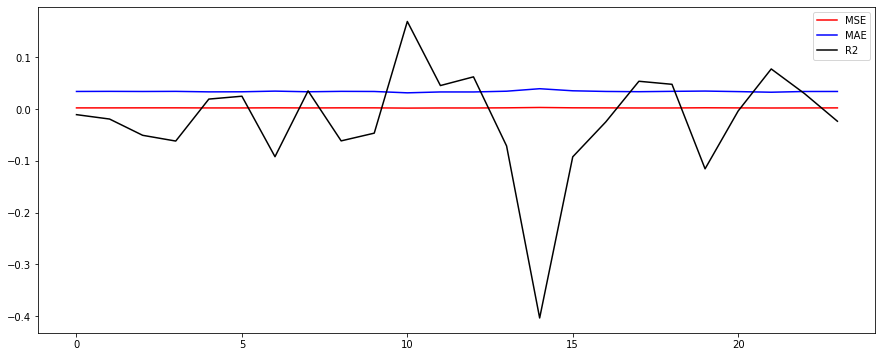

In [59]:
import sklearn.metrics
import matplotlib.pyplot as plt
import itertools

p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

p_min = 0
q_min = 0
p_max = 5
q_max = 5

for p,q in itertools.product(range(p_min,p_max+1),range(q_min,q_max+1)):
    try:
        arima_model = ARIMA(data_train,(p,2,q))  
        result = arima_model.fit()
        pred = result.predict()
        pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                          dynamic=True)
        
        data_test_result = data_test['Adjust_Tc'].values
        pred_one_result = pred_one.values

        MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
        MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
        R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)


        MSEList.append(MSE)
        MAEList.append(MAE)
        R2List.append(R2)
        p_value.append(p)
        q_value.append(q)
    except:
        continue
        
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_min = df.loc[df.R2== df.R2.min(),:]

In [60]:
MSE_min

,p,q,MSE,MAE,R2
10,2,0,0.001756,0.031245,0.169122


In [61]:
MAE_min

,p,q,MSE,MAE,R2
10,2,0,0.001756,0.031245,0.169122


In [62]:
R2_min

,p,q,MSE,MAE,R2
14,2,4,0.002967,0.03919,-0.403738


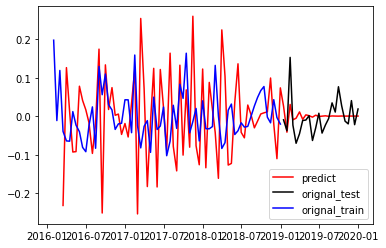

In [63]:
arima_model = ARIMA(data_train,(2,2,0))  
result = arima_model.fit()
pred = result.predict()
# pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
#                   dynamic=True) 

pred_two = result.predict(start= "2016-03-15",end =" 2019-12-31")

plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

In [64]:
# 还原报错
pridict_ = pred_two.add(AdjustTc.shift(1))
pridict_[2019] = pred_two[2019]+ AdjustTc[2018]

IndexError: index 2019 is out of bounds for axis 0 with size 92

In [97]:
pred_two

1    -0.231113
2     0.126351
3     0.012320
4    -0.092458
5    -0.091477
        ...   
88    0.000610
89    0.000705
90    0.000743
91    0.000654
92    0.000727
Length: 92, dtype: float64

In [54]:
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)

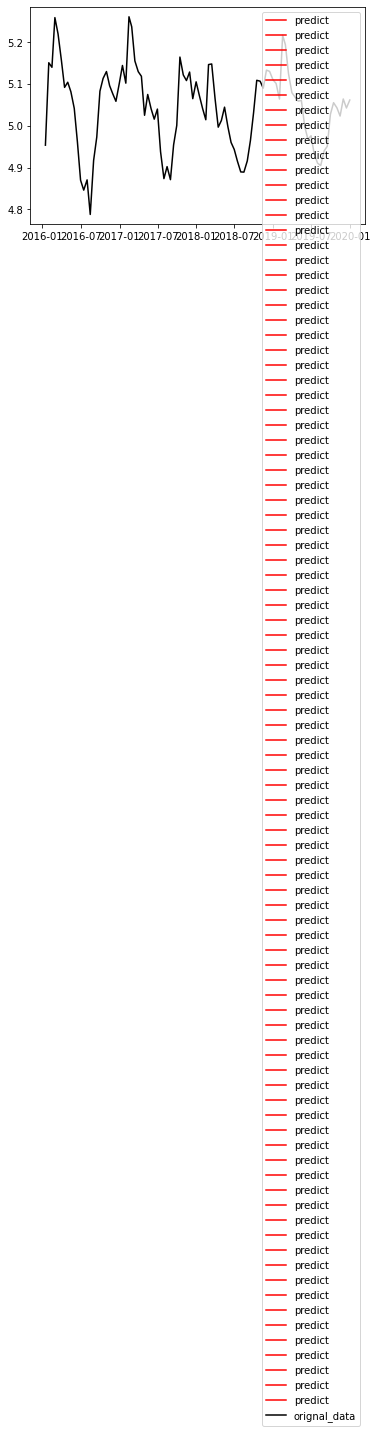

In [57]:
plt.plot(diff_recover_1,color = "red", label = "predict")
plt.plot(AdjustTc,color = "black",label = "orignal_data")
plt.legend(loc=0)

In [96]:
pred_two

1    -0.231113
2     0.126351
3     0.012320
4    -0.092458
5    -0.091477
        ...   
88    0.000610
89    0.000705
90    0.000743
91    0.000654
92    0.000727
Length: 92, dtype: float64

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import datetime

In [95]:
def inv_diff(diff_df, first_value, add_first=True):
    """
    差分序列的索引从1开始
    """
    diff_df.reset_index(drop=True, inplace=True)
    print(diff_df)
    diff_df.index = diff_df.index + 1
    print(diff_df)
    diff_df = pd.DataFrame(diff_df)
    diff_df = diff_df.cumsum()
    df = diff_df + first_value
    if add_first:
        df.loc[0] = first_value
        df.sort_index(inplace=True)
    return df

inv_diff(pred_two, 1)

0    -0.231113
1     0.126351
2     0.012320
3    -0.092458
4    -0.091477
        ...   
87    0.000610
88    0.000705
89    0.000743
90    0.000654
91    0.000727
Length: 92, dtype: float64
1    -0.231113
2     0.126351
3     0.012320
4    -0.092458
5    -0.091477
        ...   
88    0.000610
89    0.000705
90    0.000743
91    0.000654
92    0.000727
Length: 92, dtype: float64


,0
0,1.000000
1,0.768887
2,0.895237
3,0.907558
4,0.815100
...,...
88,0.951723
89,0.952428
90,0.953171
91,0.953825


DatetimeIndex(['2019-01-15', '2019-01-31', '2019-02-15', '2019-02-28',
               '2019-03-15', '2019-03-31', '2019-04-15', '2019-04-30',
               '2019-05-15', '2019-05-31', '2019-06-15', '2019-06-30',
               '2019-07-15', '2019-07-31', '2019-08-15', '2019-08-31'],
              dtype='datetime64[ns]', freq='SM-15')
[-0.09245793173457217, -0.09147693583476134, 0.07815502991128738, 0.04109712342260058, 0.017085860308868932, -0.01665909965151391, -0.09614044709241265, -0.018755584068003567, 0.17434856203019192, -0.25071618689392267, 0.13354009332922667, 0.017756047959606336, 0.07449822553648527, 0.0028144111168547856, 0.005860794807142841, -0.04685129966644938]
2019-01-15   -0.092458
2019-01-31   -0.091477
2019-02-15    0.078155
2019-02-28    0.041097
2019-03-15    0.017086
2019-03-31   -0.016659
2019-04-15   -0.096140
2019-04-30   -0.018756
2019-05-15    0.174349
2019-05-31   -0.250716
2019-06-15    0.133540
2019-06-30    0.017756
2019-07-15    0.074498
2019-07-31    

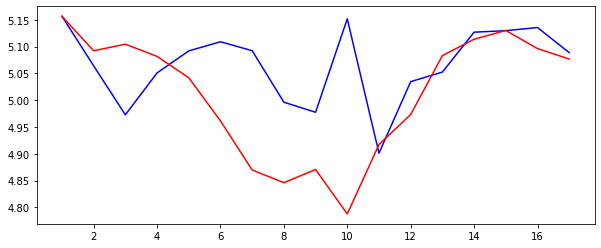

In [79]:
def string_toDatetime(string):
    return  datetime.datetime.strptime(string, "%Y-%m-%d %H:%M:%S")
 
def ARIMA_model(train_H,train,test):
    arima_model = ARIMA(train,order =(2,2,0)) #ARIMA模型
    result = arima_model.fit()
    pred = result.predict()
    
    idx = pd.date_range(string_toDatetime('2019-01-15 00:00:00'),periods=len(pred[4:20]),freq='SM')
    print(idx)
    pred_list= []  
    for i in range(len(pred[4:20])):
        pred_list.append(np.array(pred)[i+4])
    pred_numpy = pd.Series(np.array(pred_list),index=idx)
    print(pred_list)
    print(pred_numpy)
    print("+++++++++++++++")
    print(train_H)
    
    pred_restored = pd.Series(np.array(train_H)[5][0],\
         index=[train_H.index[5]]).append(pred_numpy).cumsum()
    print(pred_restored)
    x1 = np.array(pred_restored)
    print(x1)
    print("==========")
    x2 = np.array(train_H[5:22])
    print(train_H[5:22])
    print(x2)
    y = []
    for i in range(len(pred_restored)):
        y.append(i+1)
    y = np.array(y)
    fig1 = plt.figure(figsize=(10,4))
    plt.plot(y,x1,color='blue')
    plt.plot(y,x2,color='red')
    plt.show()
    
ARIMA_model(AdjustTc,data_train,data_test)

### test

In [81]:
import pandas as pd
df = pd.DataFrame({'a':[1,2,3,4,6,8,10]})
df

,a
0,1
1,2
2,3
3,4
4,6
5,8
6,10


In [85]:
df1 = df.diff(1)
df1.dropna(inplace=True)
df1

,a
1,1.0
2,1.0
3,1.0
4,2.0
5,2.0
6,2.0


In [87]:
df1.reset_index(drop=True, inplace=True)
df1

,a
0,1.0
1,1.0
2,1.0
3,2.0
4,2.0
5,2.0


In [89]:
df1.index = df1.index + 1
df1

,a
2,1.0
3,1.0
4,1.0
5,2.0
6,2.0
7,2.0


In [91]:
df1 = pd.DataFrame(df1)
df1 = df1.cumsum()
df1

,a
2,1.0
3,2.0
4,3.0
5,5.0
6,7.0
7,9.0


In [93]:
df = df1 + 1
df

,a
2,2.0
3,3.0
4,4.0
5,6.0
6,8.0
7,10.0


In [94]:
if add_first=True:
        df.loc[0] = 1
        df.sort_index(inplace=True)
        
df

SyntaxError: invalid syntax (<ipython-input-94-f0d25a6a267a>, line 1)

In [80]:
def inv_diff(diff_df, first_value, add_first=True):
    """
    差分序列的索引从1开始
    """
    diff_df.reset_index(drop=True, inplace=True)
    print(diff_df)
    diff_df.index = diff_df.index + 1
    print(diff_df)
    diff_df = pd.DataFrame(diff_df)
    diff_df = diff_df.cumsum()
    df = diff_df + first_value
    if add_first:
        df.loc[0] = first_value
        df.sort_index(inplace=True)
    return df

df1 = df.diff(1)
df1.dropna(inplace=True)
inv_diff(df1, 1)

     a
0  1.0
1  1.0
2  1.0
3  2.0
4  2.0
5  2.0
     a
1  1.0
2  1.0
3  1.0
4  2.0
5  2.0
6  2.0


,a
0,1.0
1,2.0
2,3.0
3,4.0
4,6.0
5,8.0
6,10.0


### 对数变换

In [66]:
ts_log = np.log(AdjustTc)

<AxesSubplot:xlabel='Date'>

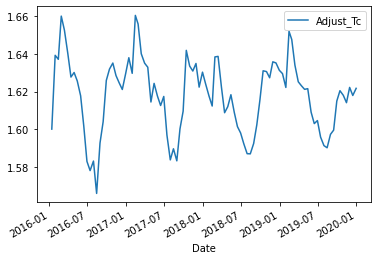

In [67]:
ts_log.plot()